Neste notebook iremos efetuar uma pequena exploração de dados. Iremos também calcular a frequência das palavras em todos as publicações

In [25]:
import re
import string
import nltk
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

STOP_WORDS = stopwords.words()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jpmrs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jpmrs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


De forma a reduzirmos o número de palavras utilizamos funcionalidades do nltk para criar a função cleaning() que nos permite verificar se uma palavra é ou não stop word.
Para além disso convertemos todas as palavras para minuscula, removemos link e carateres especiais.

In [26]:
def cleaning(text):
    """
    Convert to lowercase.
    Rremove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
    if(isinstance(text, str)):
        text = str(text.lower())
        text = re.sub('https?://\S+|www\.\S+', '', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\n', '', text)
        text = re.sub('[’“”…]', '', text)

        # removing the stop-words
        text_tokens = word_tokenize(text)
        tokens_without_sw = [word for word in text_tokens if not word in STOP_WORDS]
        filtered_sentence = (" ").join(tokens_without_sw)
        text = filtered_sentence

        return text

De seguida vamos ler o dataset das publicações e aplicar-lhe a função de cleaning()

In [27]:
#read csv to pandas dataframe
df = pd.read_csv('dataset_gastric_cancer.csv', sep='#')
#apply cleaning() to dataframe
dt = df['summary'].apply(cleaning)

#calculate words frequency
word_count = Counter(" ".join(filter(None, dt)).split()).most_common(100000000000)

#create dataframe with words frequency
word_count = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])

#save words frequency dataframe
word_frequency.to_csv('word_count.csv',index=False)

Apresentar as 20 palavras mais frequentes e menos frequentes

<AxesSubplot:ylabel='Word'>

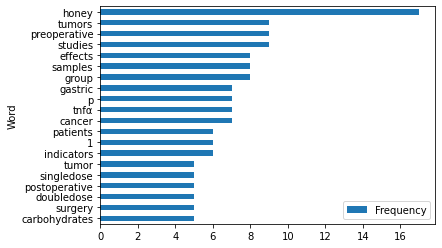

In [28]:
word_frequency.sort_values('Frequency', ascending=False).set_index('Word')[:20].sort_values('Frequency', ascending=True).plot(kind='barh')

<AxesSubplot:ylabel='Word'>

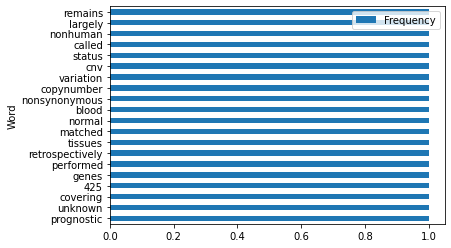

In [24]:
word_frequency.sort_values('Frequency', ascending=True).set_index('Word')[:20].sort_values('Frequency', ascending=True).plot(kind='barh')